# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | saurimo
Processing Record 3 of Set 1 | sao jose da coroa grande
Processing Record 4 of Set 1 | kingston
Processing Record 5 of Set 1 | kiunga
Processing Record 6 of Set 1 | kasongo-lunda
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | san patricio
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | den burg
Processing Record 13 of Set 1 | aleksandrovsk-sakhalinskiy
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | vadso
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | corumba
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | uturoa
Proce

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame(city_data) 


# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,11.30,63,2,0.45,US,1729812402
1,saurimo,-9.6608,20.3916,18.22,95,100,1.23,AO,1729812426
2,sao jose da coroa grande,-8.8978,-35.1478,24.99,71,1,5.20,BR,1729812428
3,kingston,17.9970,-76.7936,29.53,79,20,3.09,JM,1729812405
4,kiunga,-6.1219,141.2906,25.19,73,95,1.16,PG,1729812194


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,11.30,63,2,0.45,US,1729812402
1,saurimo,-9.6608,20.3916,18.22,95,100,1.23,AO,1729812426
2,sao jose da coroa grande,-8.8978,-35.1478,24.99,71,1,5.20,BR,1729812428
3,kingston,17.9970,-76.7936,29.53,79,20,3.09,JM,1729812405
4,kiunga,-6.1219,141.2906,25.19,73,95,1.16,PG,1729812194


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

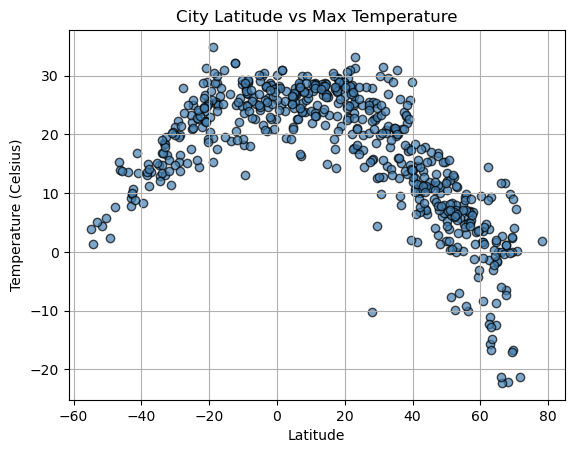

In [17]:
# Build scatter plot for latitude vs. temperature
#plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o')
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='steelblue', alpha=0.7, edgecolor='black', marker='o')
# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

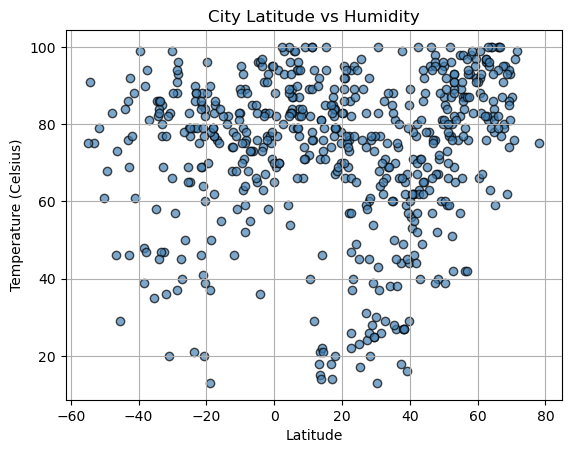

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='steelblue', alpha=0.7, edgecolor='black', marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

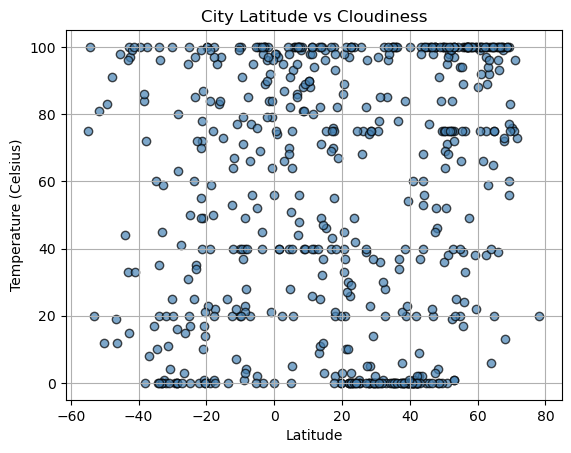

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='steelblue', alpha=0.7, edgecolor='black', marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

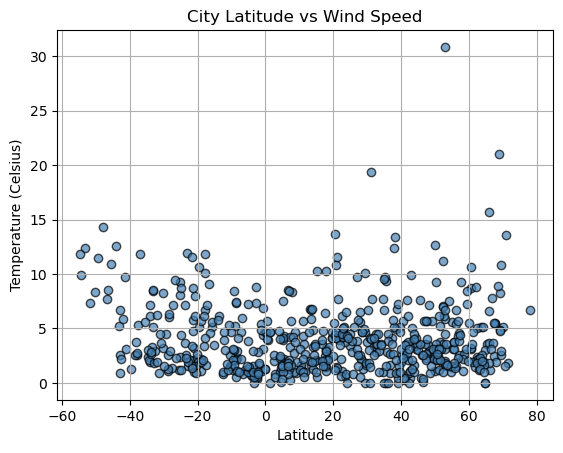

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='steelblue', alpha=0.7, edgecolor='black', marker='o')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, output_path):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Generate regression line
    regression_line = slope * np.array(x_values) + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, color='steelblue', alpha=0.7, edgecolor='black', marker='o')
    
    # Plot regression line
    plt.plot(x_values, regression_line, color='red', label=f'Linear fit (r={rvalue:.2f})')
    
    # Add labels and title
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
    # Add the equation and R-squared value to the plot
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}\nR² = {rvalue**2:.2f}', 
                 xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red',
                 bbox=dict(facecolor='white', alpha=0.5))
    
    # Save the plot
    plt.savefig(output_path)
    
    # Show the plot
    plt.show()

In [40]:

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,11.30,63,2,0.45,US,1729812402
3,kingston,17.9970,-76.7936,29.53,79,20,3.09,JM,1729812405
6,iqaluit,63.7506,-68.5145,-3.15,63,100,5.14,CA,1729812432
7,san patricio,28.0170,-97.5169,27.97,45,0,5.62,US,1729812433
9,sitka,57.0531,-135.3300,6.94,76,100,2.57,US,1729812436


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saurimo,-9.6608,20.3916,18.22,95,100,1.23,AO,1729812426
2,sao jose da coroa grande,-8.8978,-35.1478,24.99,71,1,5.20,BR,1729812428
4,kiunga,-6.1219,141.2906,25.19,73,95,1.16,PG,1729812194
5,kasongo-lunda,-6.4667,16.8167,22.63,85,56,0.84,CD,1729812431
8,bredasdorp,-34.5322,20.0403,12.84,86,10,2.41,ZA,1729812435


###  Temperature vs. Latitude Linear Regression Plot

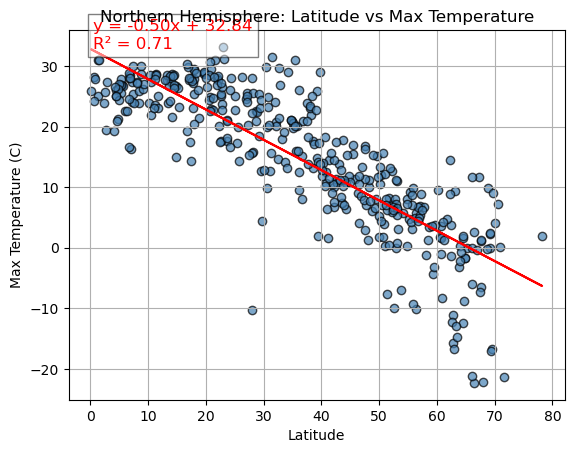

In [44]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],
                       'Latitude', 'Max Temperature (C)',
                       'Northern Hemisphere: Latitude vs Max Temperature',
                       'output_data/north_lat_vs_temp_regression.png')

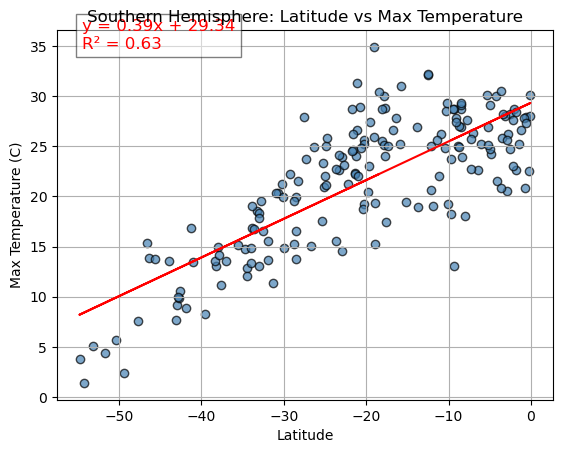

In [46]:
# Linear regression on Southern Hemisphere

plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],
                       'Latitude', 'Max Temperature (C)',
                       'Southern Hemisphere: Latitude vs Max Temperature',
                       'output_data/south_lat_vs_temp_regression.png')


**Discussion about the linear relationship:** 

Latitude vs Temperature: There is a clear negative linear relationship in both the Northern and Southern Hemispheres, where temperatures decrease as you move away from the equator, with higher temperatures near the equator and lower temperatures near the poles.



### Humidity vs. Latitude Linear Regression Plot

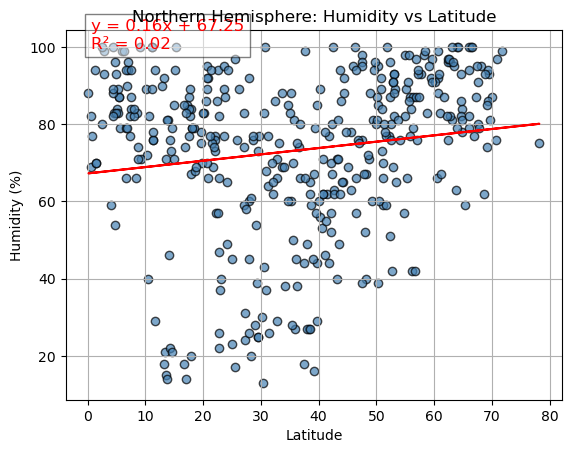

In [50]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],
                       'Latitude', 'Humidity (%)',
                       'Northern Hemisphere: Humidity vs Latitude',
                       'output_data/north_lat_vs_humidity_regression.png')

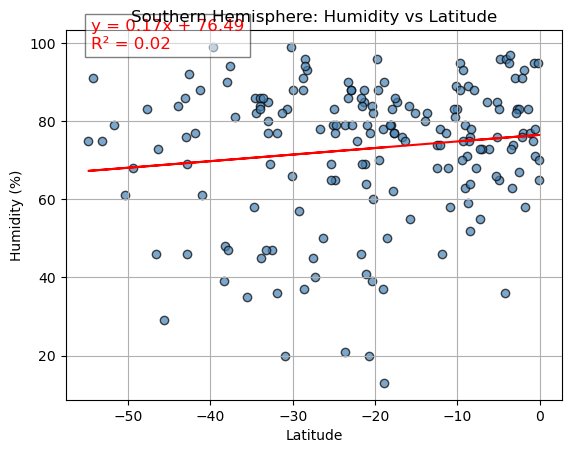

In [57]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],
                       'Latitude', 'Humidity (%)',
                       'Southern Hemisphere: Humidity vs Latitude',
                       'output_data/south_lat_vs_humidity_regression.png')

**Discussion about the linear relationship:** 

Humidity vs. Latitude: The relationship between humidity and latitude is weak in both the Northern and Southern Hemispheres. Humidity is influenced by multiple factors beyond latitude, such as proximity to oceans, altitude, and local climate systems. As a result, linear regression typically shows a low R-squared value in both hemispheres, indicating that latitude alone is not a strong predictor of humidity.



### Cloudiness vs. Latitude Linear Regression Plot

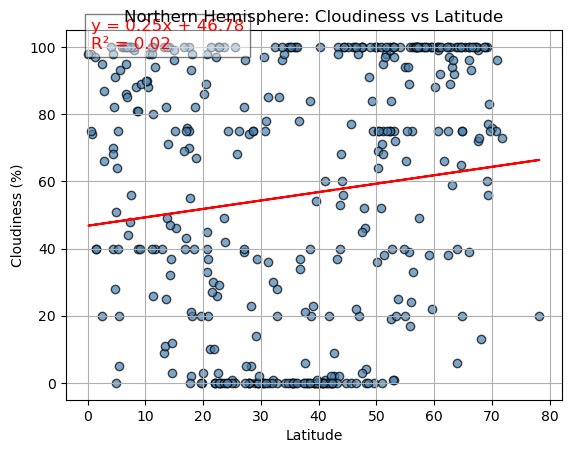

In [59]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
                       'Latitude', 'Cloudiness (%)',
                       'Northern Hemisphere: Cloudiness vs Latitude',
                       'output_data/north_lat_vs_cloudiness_regression.png')

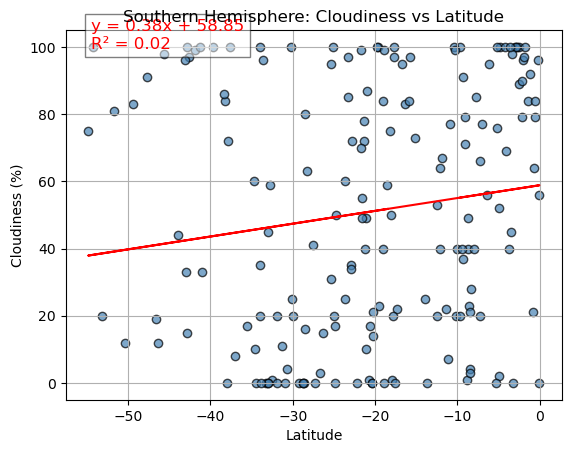

In [61]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],
                       'Latitude', 'Cloudiness (%)',
                       'Southern Hemisphere: Cloudiness vs Latitude',
                       'output_data/south_lat_vs_cloudiness_regression.png')

**Discussion about the linear relationship:** 

The relationship between cloudiness and latitude in the Northern Hemisphere is weak, with a low R-squared value, indicating that latitude alone is not a strong predictor of cloudiness, which is influenced by various local atmospheric and geographic factors.

### Wind Speed vs. Latitude Linear Regression Plot

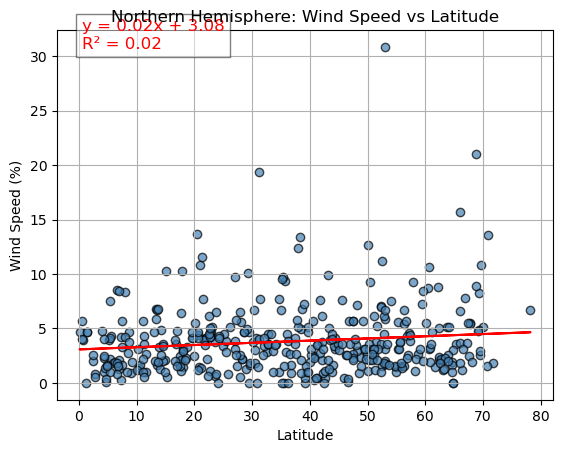

In [64]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                       'Latitude', 'Wind Speed (%)',
                       'Northern Hemisphere: Wind Speed vs Latitude',
                       'output_data/north_lat_vs_Wind_Speed_regression.png')

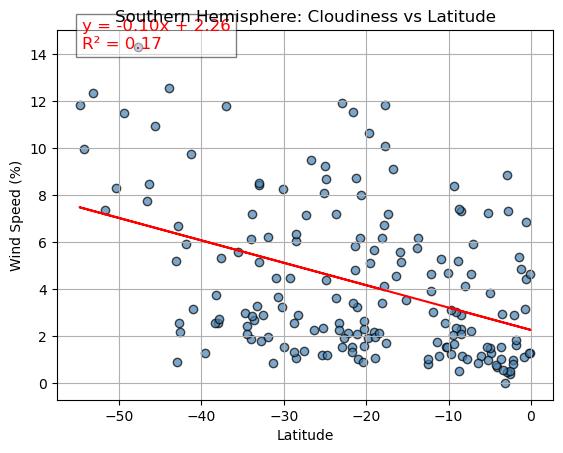

In [66]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
                       'Latitude', 'Wind Speed (%)',
                       'Southern Hemisphere: Cloudiness vs Latitude',
                       'output_data/south_lat_vs_Wind_Speed_regression.png')

**Discussion about the linear relationship:** 

The relationship between wind speed and latitude is weak, with a low R-squared value, as wind speed is influenced more by local geographic features and atmospheric pressure systems than by latitude alone.